# Chapter: Machine Learning for Plant Health Management: Workflow and Best Practices


# Topic: Data Balancing

In [1]:
# import required packages
import numpy as np, matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 20})

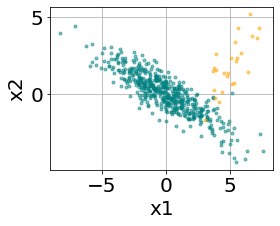

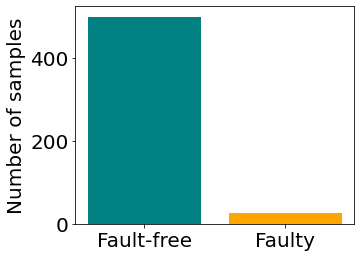

In [2]:
# generate data
np.random.seed(1)

cov = np.array([[6, -3], [-3, 2]])
pts_NOC = np.random.multivariate_normal([0, 0], cov, size=500)
cov = np.array([[1, 1], [1, 2]])
pts_Faulty = np.random.multivariate_normal([5,2], cov, size=25)
X = np.vstack((pts_NOC, pts_Faulty))
y = np.vstack((np.zeros((500,1)), np.ones((25,1)))) # labels [0=>NOC; 1=>Faulty]

plt.figure(figsize=(4,3))
plt.plot(pts_NOC[:, 0], pts_NOC[:,1], '.', color='teal',alpha=0.5)
plt.plot(pts_Faulty[:, 0], pts_Faulty[:, 1], '.', color='orange',alpha=0.5)
plt.xlabel('x1'), plt.ylabel('x2')
plt.grid()
plt.show()

plt.figure(figsize=(5,4))
plt.bar([0,1], [np.sum(y==0), np.sum(y==1)], tick_label=['Fault-free','Faulty'], color=['teal','orange'])
plt.ylabel('Number of samples')

plt.show()

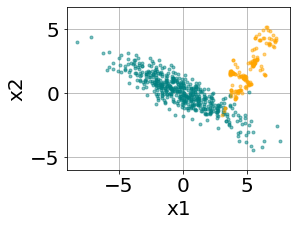

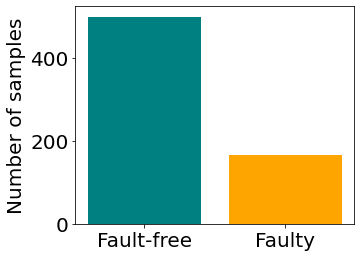

In [3]:
# Oversampling
from imblearn.over_sampling import SMOTE

overSampler = SMOTE(sampling_strategy=0.33)
X_smote, y_smote = overSampler.fit_resample(X, y)

pts_NOC_smote = X_smote[y_smote==0]
pts_Faulty_smote = X_smote[y_smote==1]

plt.figure(figsize=(4,3))
plt.plot(pts_NOC_smote[:, 0], pts_NOC_smote[:,1], '.', color='teal',alpha=0.5)
plt.plot(pts_Faulty_smote[:, 0], pts_Faulty_smote[:, 1], '.', color='orange',alpha=0.5)
plt.axis('equal')
plt.xlabel('x1'), plt.ylabel('x2')
plt.grid()

plt.figure(figsize=(5,4))
plt.bar([0,1], [np.sum(y_smote==0), np.sum(y_smote==1)], tick_label=['Fault-free','Faulty'], color=['teal','orange'])
plt.ylabel('Number of samples')

plt.show()

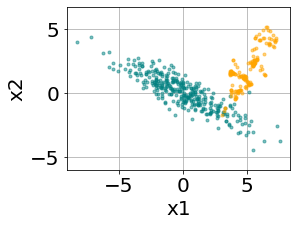

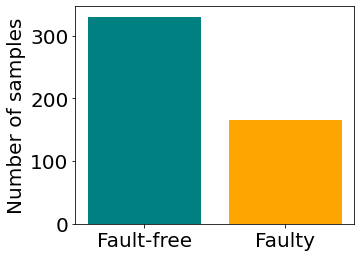

In [4]:
# Undersampling
from imblearn.under_sampling import RandomUnderSampler

underSampler = RandomUnderSampler(sampling_strategy=0.5)
X_balanced, y_balanced = underSampler.fit_resample(X_smote, y_smote)

pts_NOC_balanced = X_balanced[y_balanced==0]
pts_Faulty_balanced = X_balanced[y_balanced==1]

plt.figure(figsize=(4,3))
plt.plot(pts_NOC_balanced[:, 0], pts_NOC_balanced[:,1], '.', color='teal',alpha=0.5)
plt.plot(pts_Faulty_balanced[:, 0], pts_Faulty_balanced[:, 1], '.', color='orange',alpha=0.5)
plt.axis('equal')
plt.xlabel('x1'), plt.ylabel('x2')
plt.grid()

plt.figure(figsize=(5,4))
plt.bar([0,1], [np.sum(y_balanced==0), np.sum(y_balanced==1)], tick_label=['Fault-free','Faulty'], color=['teal','orange'])
plt.ylabel('Number of samples')

plt.show()